In [ ]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

In [ ]:
brain_vol = nib.load('/content/T1w_acpc_dc_restore_1.25.nii.gz')
brain_vol

In [ ]:
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  2.4   0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-1.25 

In [ ]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)

numpy.ndarray

In [ ]:
brain_vol_data.shape

(145, 174, 145)

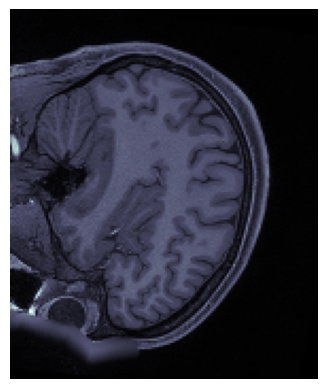

In [ ]:
plt.imshow(brain_vol_data[100], cmap='bone')
plt.axis('off')
plt.show()

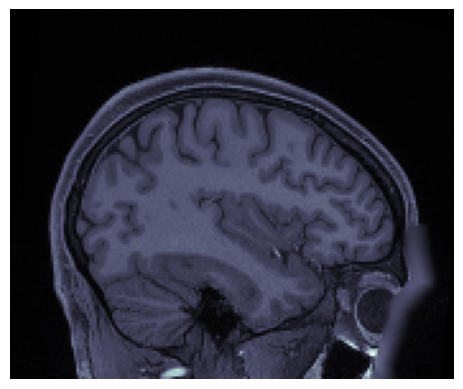

In [ ]:
plt.imshow(ndi.rotate(brain_vol_data[100], 90), cmap='bone')
plt.axis('off')
plt.show()

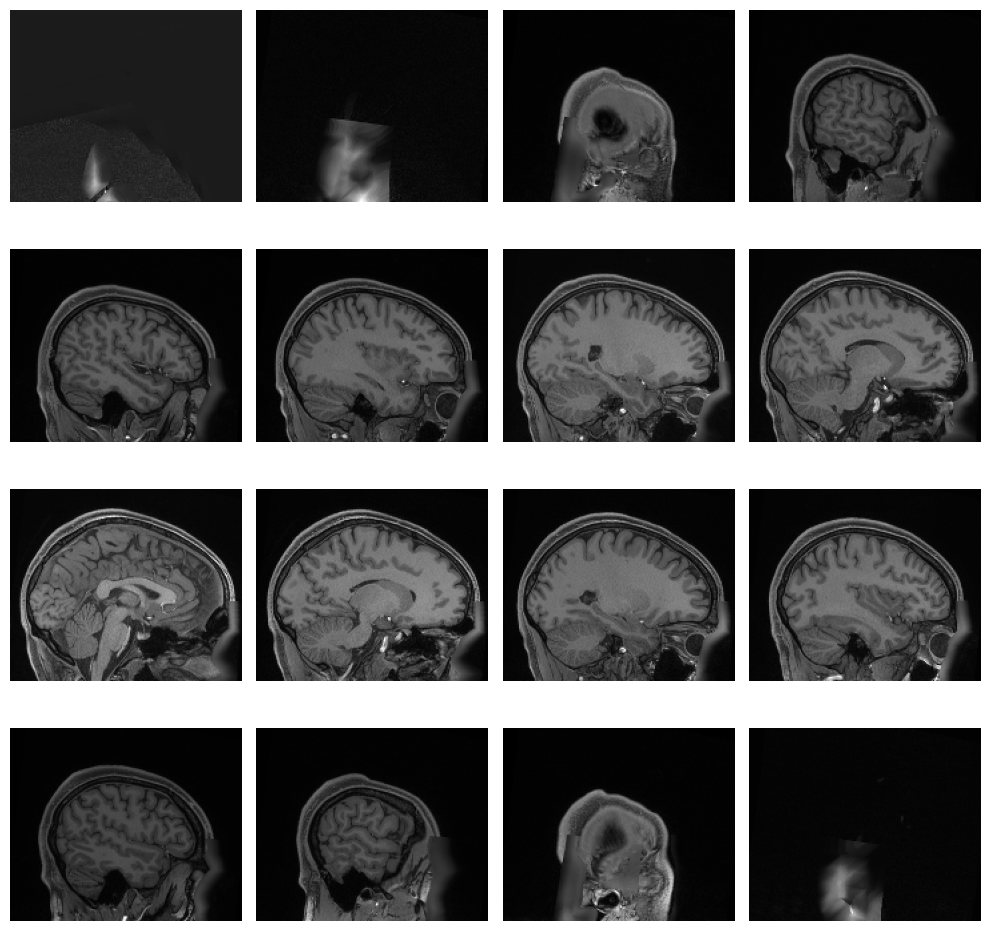

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

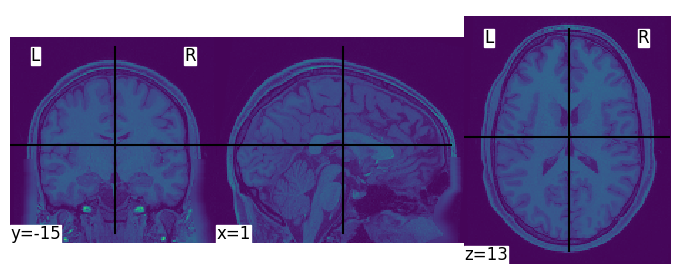

In [ ]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

In [ ]:
pip install SimpleITK 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.8 MB/s eta 0:00:00


In [ ]:
import SimpleITK as sitk
import numpy as np
from PIL import Image

In [ ]:
# Load NRRD image
filename = "path/to/nrrd/file.nrrd"
image = sitk.ReadImage(filename)
